In [11]:
## Solutions here
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

In [12]:
#Read file as panda dataframe
df = pd.read_csv(r"employee.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [13]:
df.shape

(740, 21)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [15]:
# Renaming columns

df.rename(columns={'Month of absence':'Month_absence',
                      'Day of the week':'Week',
                      'Transportation expense':'Transport_expense',
                      'Distance from Residence to Work':'Dist_ResidenceToWork',
                      'Service time':'Service_Time',
                      'Work load Average/day ':'Average_Workload',
                      'Disciplinary failure':'Disciplinary_failure',
                      'Social drinker':'Social_drinker',
                      'Social smoker':'Social_smoker',
                      'Body mass index':'Body_mass_index',
                      'Absenteeism time in hours':'Absenteeism_time_in_hrs'},inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       740 non-null    int64  
 1   Reason for absence       737 non-null    float64
 2   Month_absence            739 non-null    float64
 3   Week                     740 non-null    int64  
 4   Seasons                  740 non-null    int64  
 5   Transport_expense        733 non-null    float64
 6   Dist_ResidenceToWork     737 non-null    float64
 7   Service_Time             737 non-null    float64
 8   Age                      737 non-null    float64
 9   Average_Workload         730 non-null    object 
 10  Hit target               734 non-null    float64
 11  Disciplinary_failure     734 non-null    float64
 12  Education                730 non-null    float64
 13  Son                      734 non-null    float64
 14  Social_drinker           7

In [17]:
# checking for missing values
df.isnull().sum() 

ID                          0
Reason for absence          3
Month_absence               1
Week                        0
Seasons                     0
Transport_expense           7
Dist_ResidenceToWork        3
Service_Time                3
Age                         3
Average_Workload           10
Hit target                  6
Disciplinary_failure        6
Education                  10
Son                         6
Social_drinker              3
Social_smoker               4
Pet                         2
Weight                      1
Height                     14
Body_mass_index            31
Absenteeism_time_in_hrs    22
dtype: int64

In [18]:
df = df.drop(df[df['Month_absence'] == 0].index)

# Dropped rows with empty values in Absenteeism_time_in_hrs
df = df.drop(df[df['Absenteeism_time_in_hrs'].isna()].index)

# Dropping ID column as it is not relevant here
df = df.drop(columns=['ID'])

In [19]:

# checking for missing values
df.isnull().sum() 

Reason for absence          3
Month_absence               1
Week                        0
Seasons                     0
Transport_expense           6
Dist_ResidenceToWork        3
Service_Time                3
Age                         2
Average_Workload            8
Hit target                  6
Disciplinary_failure        5
Education                  10
Son                         6
Social_drinker              3
Social_smoker               4
Pet                         2
Weight                      1
Height                     14
Body_mass_index            29
Absenteeism_time_in_hrs     0
dtype: int64

In [20]:
# Encoding/mapping the Day of the week column
df['Week'] = df['Week'].map({2:'mon',3:'tue',4:'wed',5:'thu',6:'fri'})

# Encoding/mapping the Seasons column
df.Seasons = df.Seasons.map({1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'})

# Encoding/mapping the Month of absence column
df['Month_absence'] = df['Month_absence'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding/mapping the Education column
df.Education = df.Education.map({1:'High School',2:'Graduate',3:'Postgraduate',4:'Master or Doctorate'})


In [21]:
# check the head of the dataset
df.head()

,Reason for absence,Month_absence,Week,Seasons,Transport_expense,Dist_ResidenceToWork,Service_Time,Age,Average_Workload,Hit target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hrs
0,26.0,jul,tue,Summer,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,High School,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,0.0,jul,tue,Summer,118.0,13.0,18.0,50.0,"239,554",97.0,1.0,High School,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,23.0,jul,wed,Summer,179.0,51.0,18.0,38.0,"239,554",97.0,0.0,High School,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,jul,thu,Summer,279.0,5.0,14.0,39.0,"239,554",97.0,0.0,High School,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,23.0,jul,thu,Summer,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,High School,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [22]:
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Month_absence'] = df['Month_absence'].astype('category')
df['Week'] = df['Week'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')

# Typecast: Convert 'Workload Average/day' to float and replacing ',' by ' ' 
df["Average_Workload"] = df["Average_Workload"].replace(",", "", regex=True).astype(float)

df['Son'] = df['Son'].astype('category')
df['Social_smoker'] = df['Social_smoker'].astype('category')
df['Social_drinker'] = df['Social_drinker'].astype('category')
df['Pet'] = df['Pet'].astype('category')

df.dtypes

Reason for absence         category
Month_absence              category
Week                       category
Seasons                    category
Transport_expense           float64
Dist_ResidenceToWork        float64
Service_Time                float64
Age                         float64
Average_Workload            float64
Hit target                  float64
Disciplinary_failure        float64
Education                    object
Son                        category
Social_drinker             category
Social_smoker              category
Pet                        category
Weight                      float64
Height                      float64
Body_mass_index             float64
Absenteeism_time_in_hrs     float64
dtype: object

In [23]:
#Add a feature 'Absenteeism category' and check condition
df['Absenteeism_category'] = df['Absenteeism_time_in_hrs'].apply(lambda value: 'low' if value <= 2 else 'medium' if 3 <= value <= 5  else 'high').astype("category")
df['Absenteeism_category'].info

<bound method Series.info of 0      medium
1         low
2         low
3      medium
4         low
        ...  
732      high
733      high
734      high
735      high
736    medium
Name: Absenteeism_category, Length: 715, dtype: category
Categories (3, object): ['high', 'low', 'medium']>

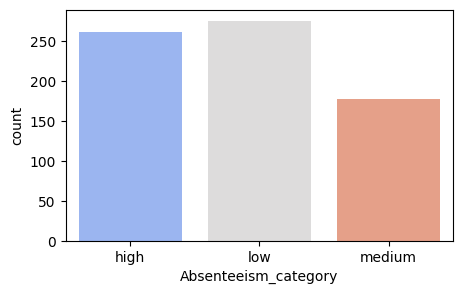

In [24]:
#class distribution of Absenteeism category
plt.figure(figsize=(5, 3))
sns.countplot(x='Absenteeism_category', data= df, palette="coolwarm")
plt.show() 

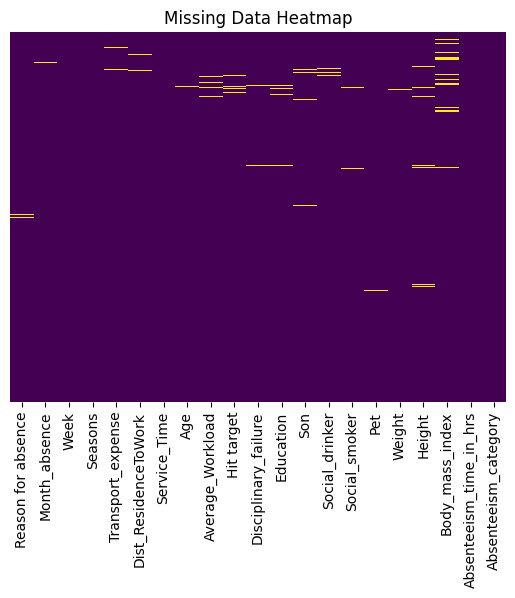

In [25]:
# missing data visualisation

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

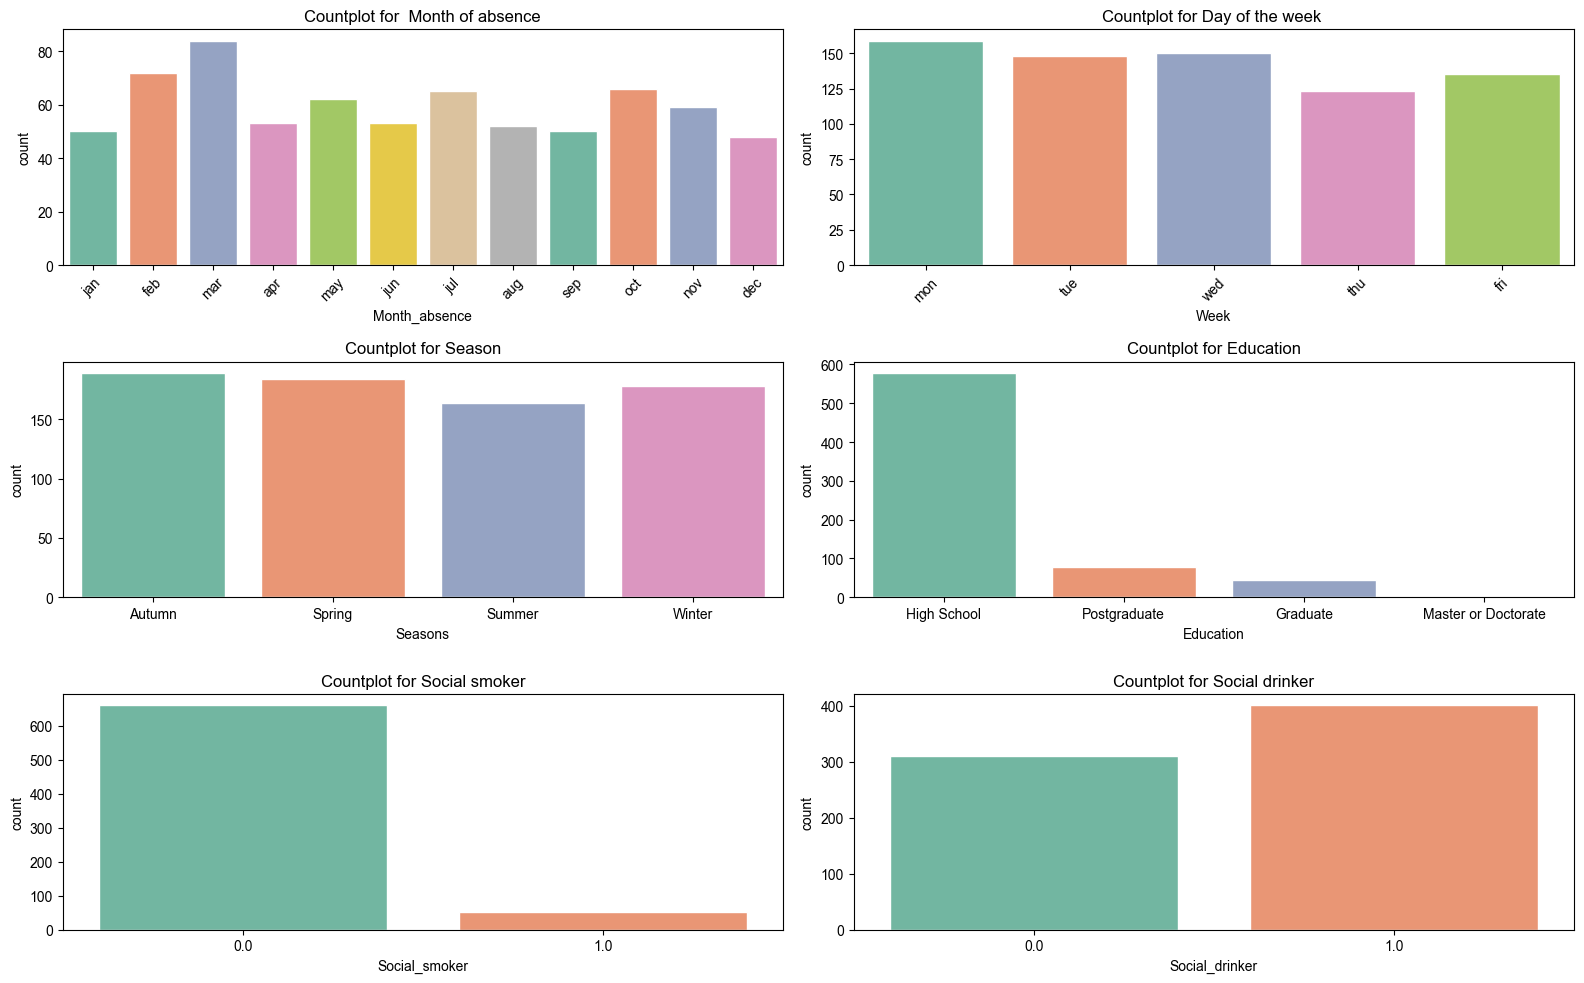

In [26]:
# univariate analysis

fig, axes = plt.subplots(3, 2, figsize=(16, 10))
sns.set(style="whitegrid")

# Subplot 1: Month of absence,
sns.countplot(data=df, x='Month_absence', ax=axes[0, 0], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],palette='Set2')
axes[0, 0].set_title('Countplot for  Month of absence')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Day of the week 
sns.countplot(data=df, x='Week', ax=axes[0, 1], order=['mon','tue','wed','thu','fri'], palette='Set2')
axes[0, 1].set_title('Countplot for Day of the week ')
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Seasons
sns.countplot(data=df, x='Seasons', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Countplot for Season')

# Subplot 4: Education
sns.countplot(data=df, x='Education', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Countplot for Education')

# Subplot 5: Social smoker
sns.countplot(data=df, x='Social_smoker', ax=axes[2, 0], palette='Set2')
axes[2, 0].set_title('Countplot for Social smoker')

# Subplot 6: Social drinker
sns.countplot(data=df, x='Social_drinker', ax=axes[2, 1], palette='Set2')
axes[2, 1].set_title('Countplot for Social drinker')

# Adjust layout
plt.tight_layout()
plt.show()

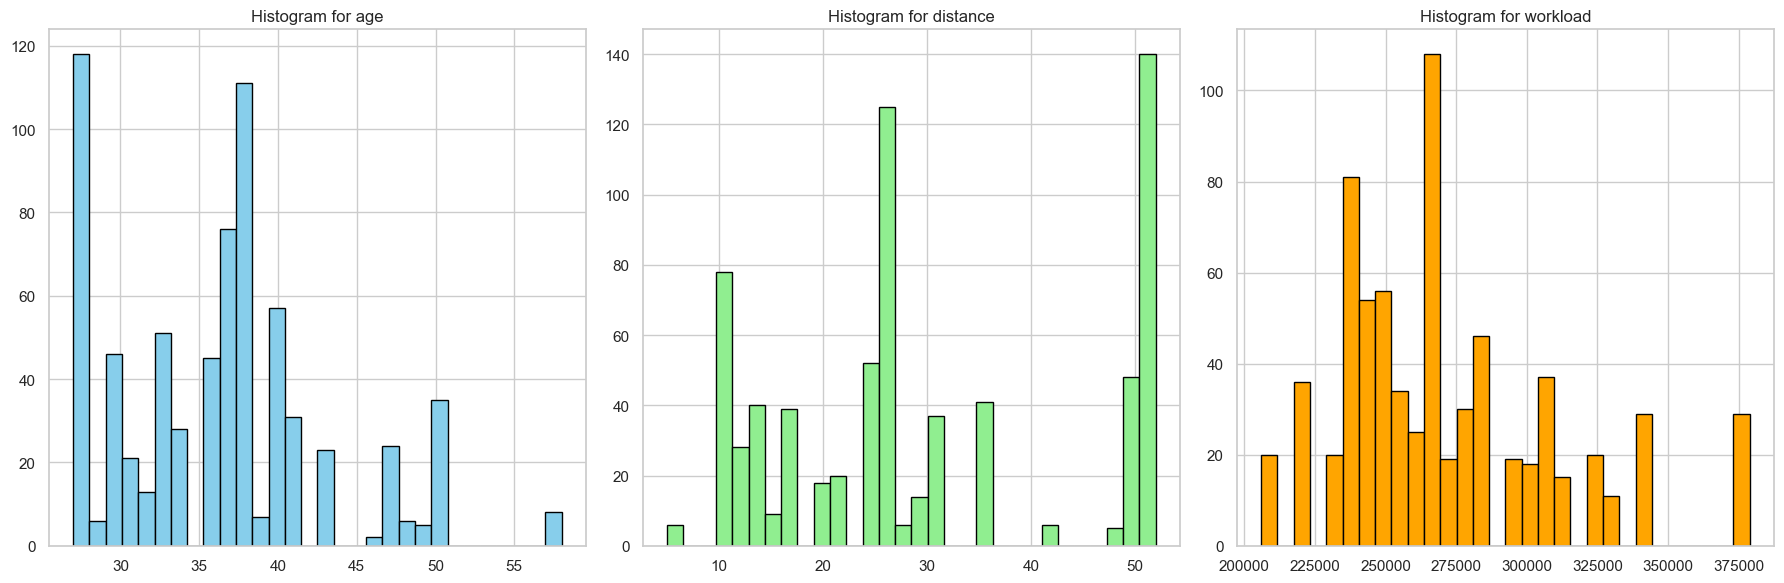

In [27]:
#Univariate Analysis

sns.set(style='whitegrid')

# Create subplots (1 rows, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram 1: Age
axes[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for age')

# Histogram 2: Distance from Residence to Work
axes[1].hist(df['Dist_ResidenceToWork'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram for distance')

# Histogram 3: Work load Average/day                    
axes[2].hist(df['Average_Workload'], bins=30, color='orange', edgecolor='black')
axes[2].set_title('Histogram for workload')


# Adjust layout
plt.tight_layout()
plt.show()


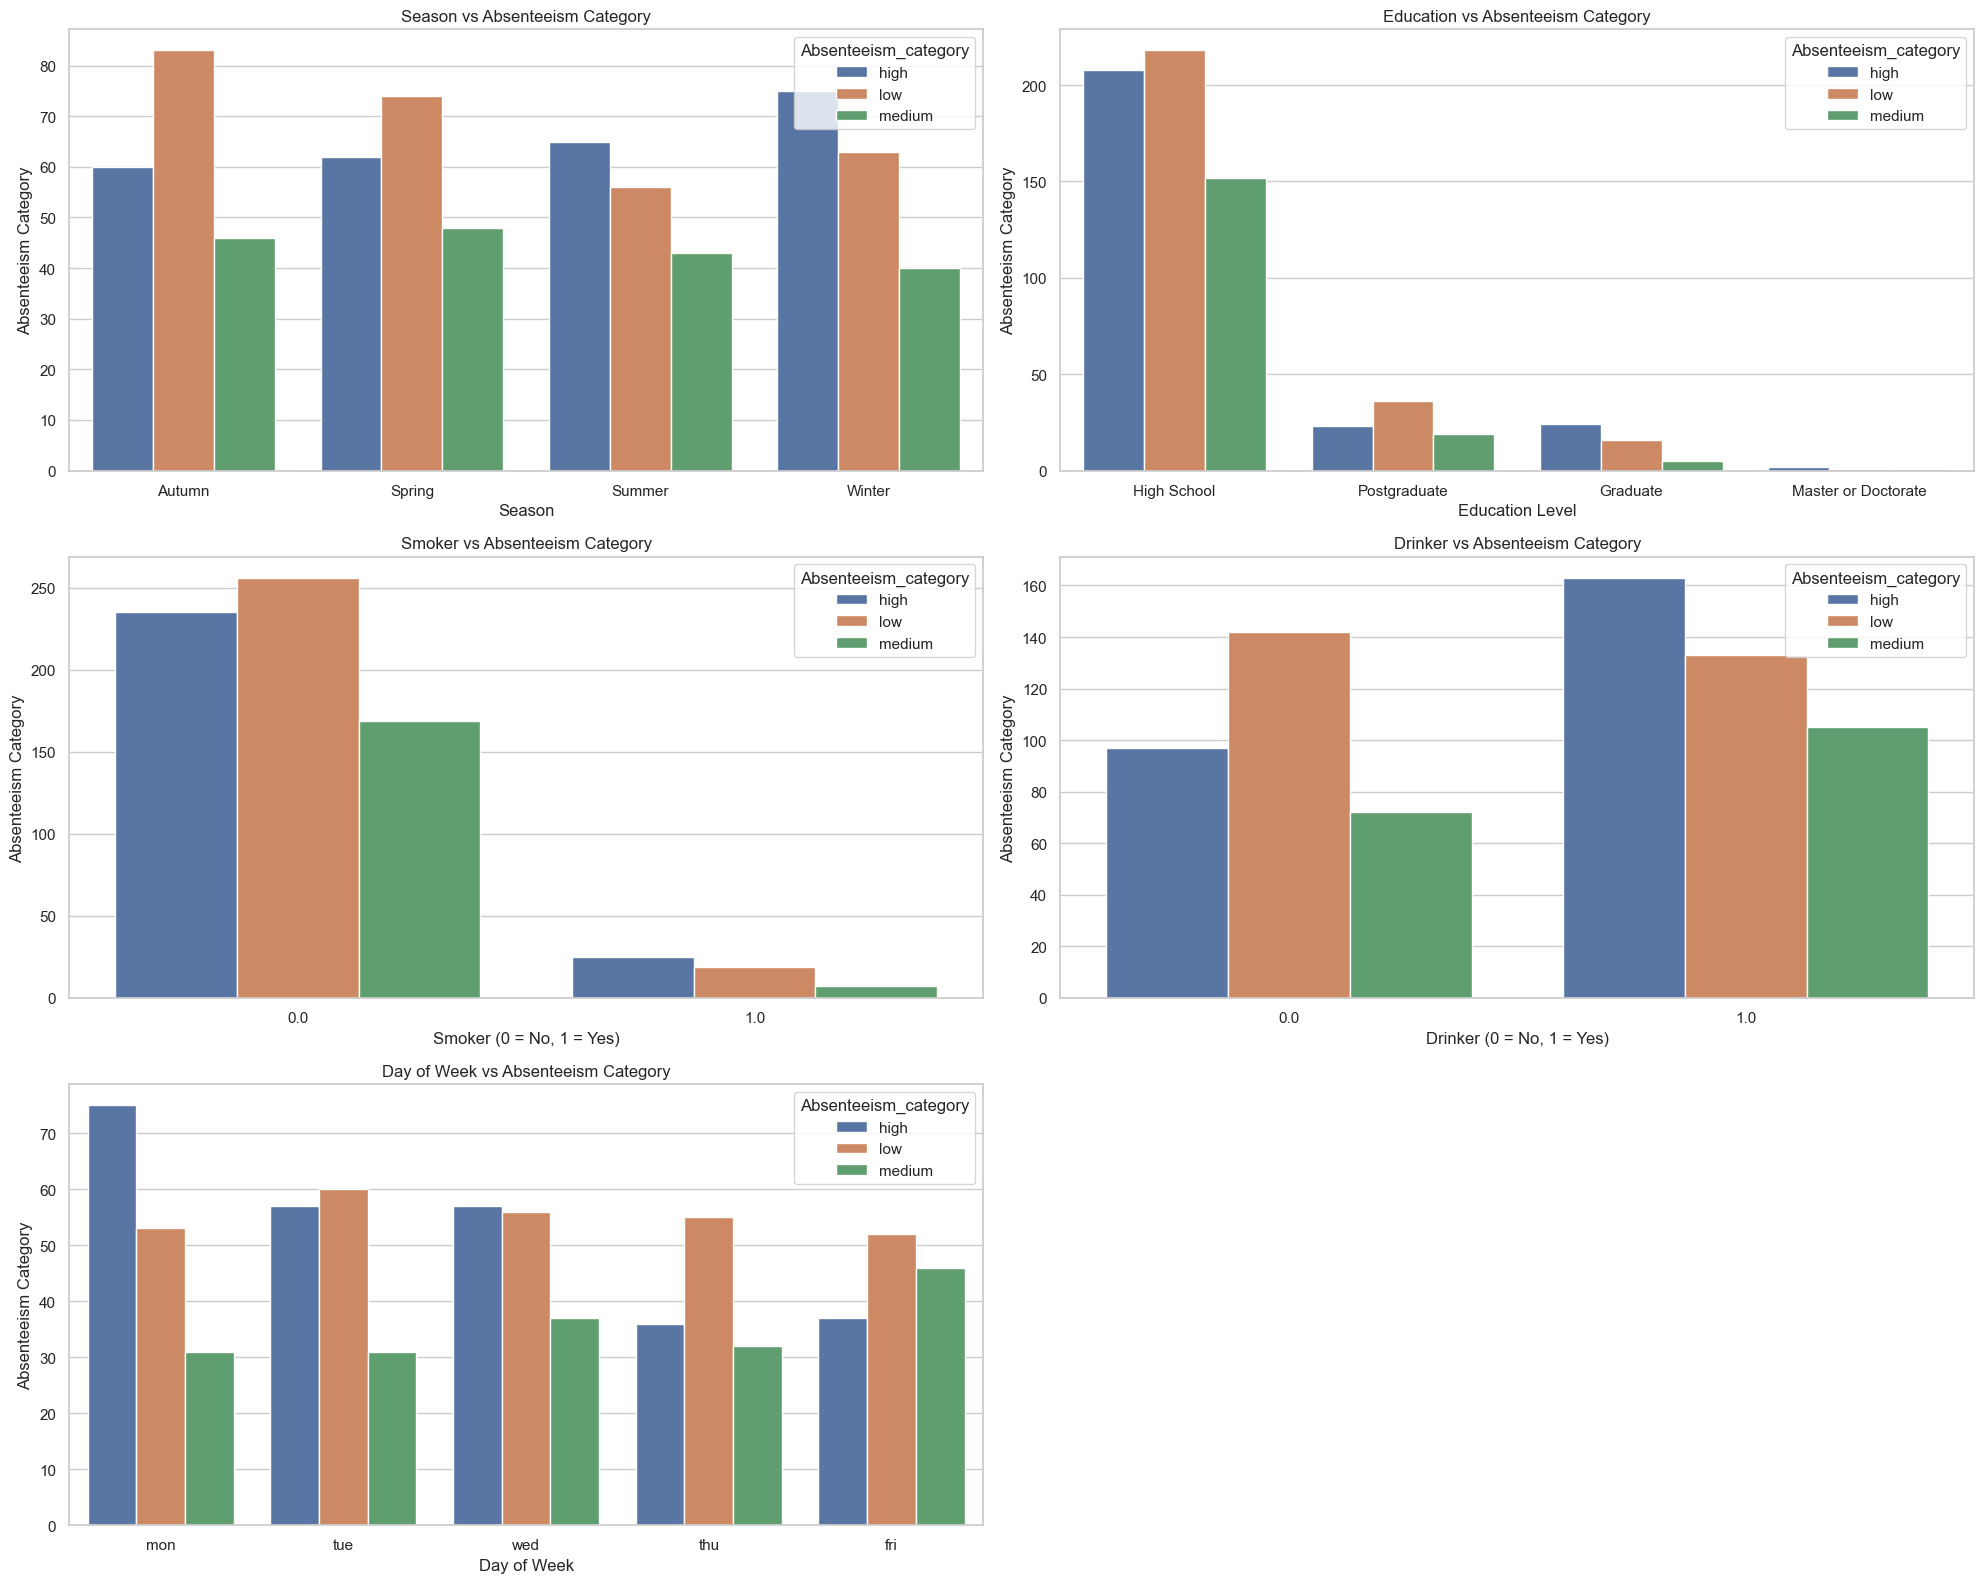

In [28]:
# Bivariate analysis

sns.set(style='whitegrid')

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(20, 16))

# Plot 1: Season vs Absenteeism_category
sns.countplot(data=df, x='Seasons', hue='Absenteeism_category', ax=axes[0, 0])
axes[0, 0].set_title('Season vs Absenteeism Category')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Absenteeism Category')

# Plot 2: Education vs Absenteeism_category
sns.countplot(data=df, x='Education', hue='Absenteeism_category', ax=axes[0, 1])
axes[0, 1].set_title('Education vs Absenteeism Category')
axes[0, 1].set_xlabel('Education Level')
axes[0, 1].set_ylabel('Absenteeism Category')

# Plot 3: Smoker vs Absenteeism_category
sns.countplot(data=df, x='Social_smoker', hue='Absenteeism_category', ax=axes[1, 0])
axes[1, 0].set_title('Smoker vs Absenteeism Category')
axes[1, 0].set_xlabel('Smoker (0 = No, 1 = Yes)')
axes[1, 0].set_ylabel('Absenteeism Category')

# Plot 4: Drinker vs Absenteeism_category
sns.countplot(data=df, x='Social_drinker', hue='Absenteeism_category', ax=axes[1, 1])
axes[1, 1].set_title('Drinker vs Absenteeism Category')
axes[1, 1].set_xlabel('Drinker (0 = No, 1 = Yes)')
axes[1, 1].set_ylabel('Absenteeism Category')

# Plot 5: Week vs Absenteeism_category (NEW)
sns.countplot(data=df, x='Week', hue='Absenteeism_category',
              order=['mon','tue','wed','thu','fri'], ax=axes[2, 0])
axes[2, 0].set_title('Day of Week vs Absenteeism Category')
axes[2, 0].set_xlabel('Day of Week')
axes[2, 0].set_ylabel('Absenteeism Category')

# Empty last subplot
axes[2, 1].axis('off')

# Layout
plt.tight_layout()
plt.show()



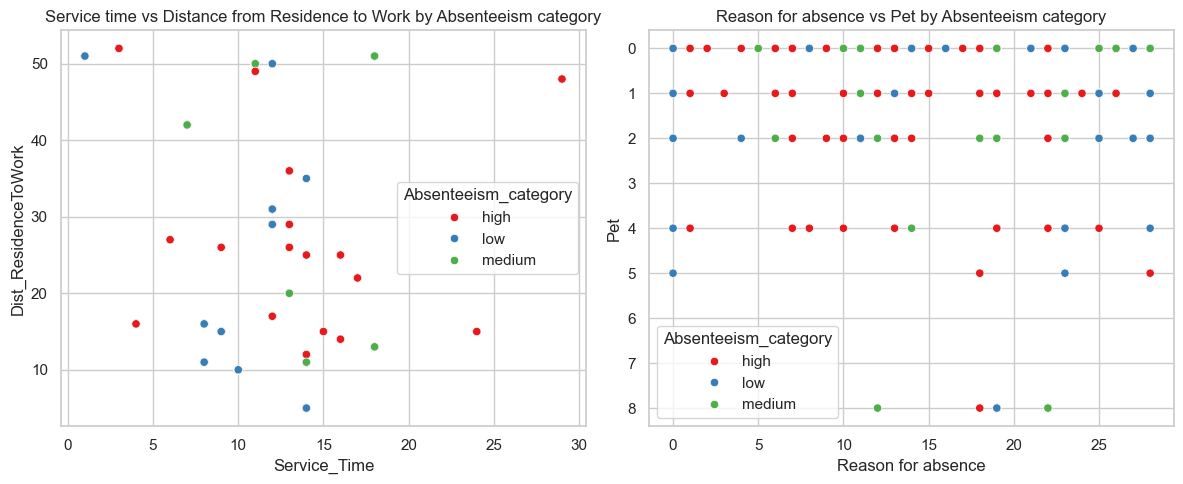

In [29]:
# Scatterplot to check if there is any separatability or not

sns.set_style("whitegrid")

# Create a 1x2 figure (side by side plots)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Service time vs Distance from Residence to Work
g1 = sns.scatterplot(x='Service_Time', y='Dist_ResidenceToWork', hue='Absenteeism_category', data=df, ax=axes[0], palette='Set1')
axes[0].set_title("Service time vs Distance from Residence to Work by Absenteeism category")

# Plot 2: Reason for absence vs Pet
g2 = sns.scatterplot(x='Reason for absence', y='Pet', hue='Absenteeism_category', data=df, ax=axes[1], palette='Set1')
axes[1].set_title("Reason for absence vs Pet by Absenteeism category")

# Adjust layout
plt.tight_layout()
plt.show()

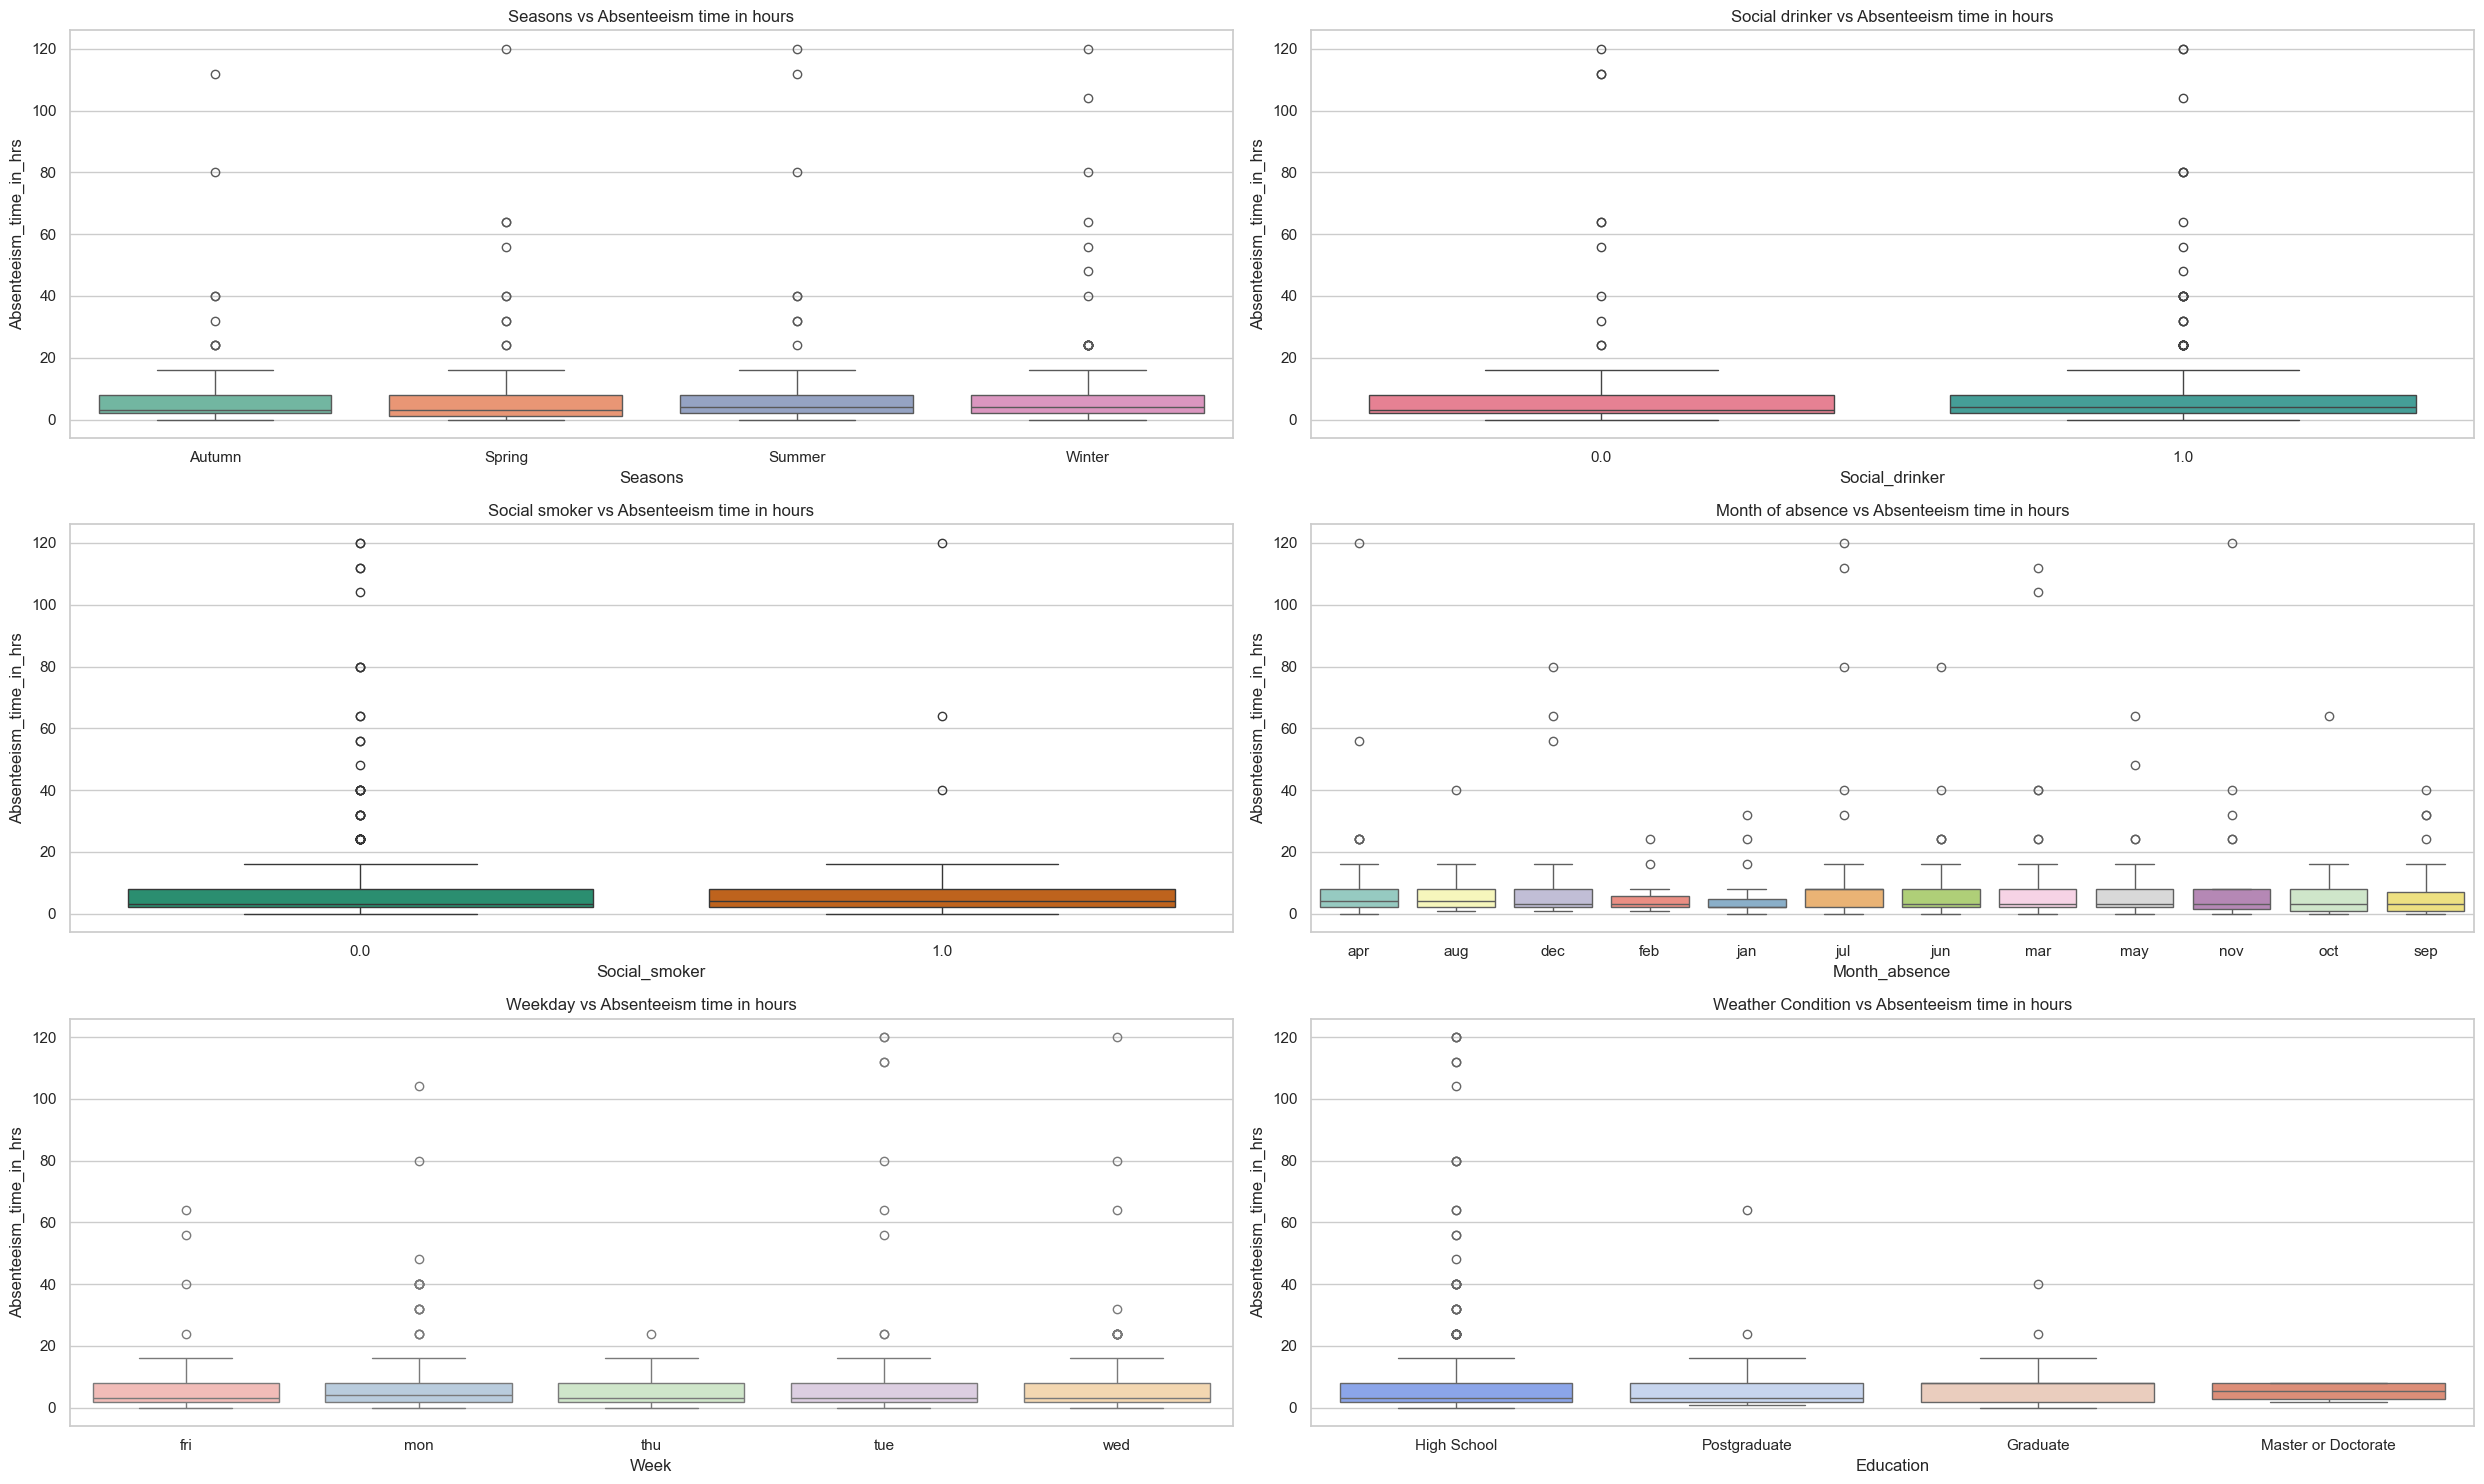

In [30]:
# Create 3x2 subplot grid- boxplots
fig, axes = plt.subplots(3, 2, figsize=(25, 15))

# Flatten axes for easier iteration
axes = axes.flatten()

# 1. Season vs Absenteeism time in hours
sns.boxplot(x='Seasons', y='Absenteeism_time_in_hrs', data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Seasons vs Absenteeism time in hours")

# 2. Social drinker vs Absenteeism time in hours
sns.boxplot(x='Social_drinker', y='Absenteeism_time_in_hrs', data=df, palette="husl", ax=axes[1])
axes[1].set_title("Social drinker vs Absenteeism time in hours")

# 3. social smoker vs Absenteeism time in hours
sns.boxplot(x='Social_smoker', y='Absenteeism_time_in_hrs', data=df, palette="Dark2", ax=axes[2])
axes[2].set_title("Social smoker vs Absenteeism time in hours")

# 4. Month vs Absenteeism time in hours
sns.boxplot(x='Month_absence', y='Absenteeism_time_in_hrs', data=df, palette="Set3", ax=axes[3])
axes[3].set_title("Month of absence vs Absenteeism time in hours")

# 5. Weekday vs Absenteeism time in hours
sns.boxplot(x='Week', y='Absenteeism_time_in_hrs', data=df, palette="Pastel1", ax=axes[4])
axes[4].set_title("Weekday vs Absenteeism time in hours")

# 6. Education vs Absenteeism time in hours
sns.boxplot(x='Education', y='Absenteeism_time_in_hrs', data=df, palette="coolwarm", ax=axes[5])
axes[5].set_title("Weather Condition vs Absenteeism time in hours")

# Adjust layout
plt.tight_layout()
plt.show()


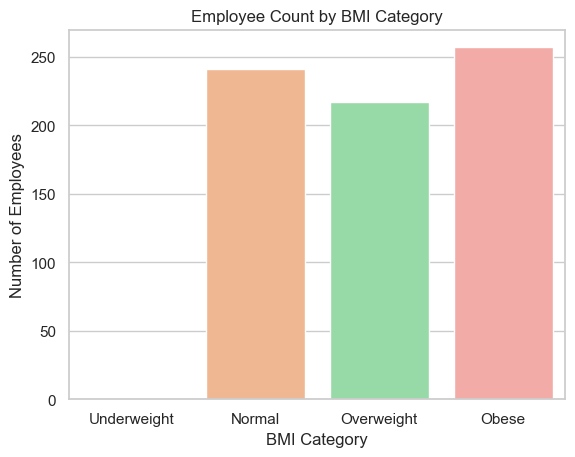

<class 'pandas.core.series.Series'>
Index: 715 entries, 0 to 736
Series name: Distance_Category
Non-Null Count  Dtype   
--------------  -----   
715 non-null    category
dtypes: category(1)
memory usage: 22.6 KB


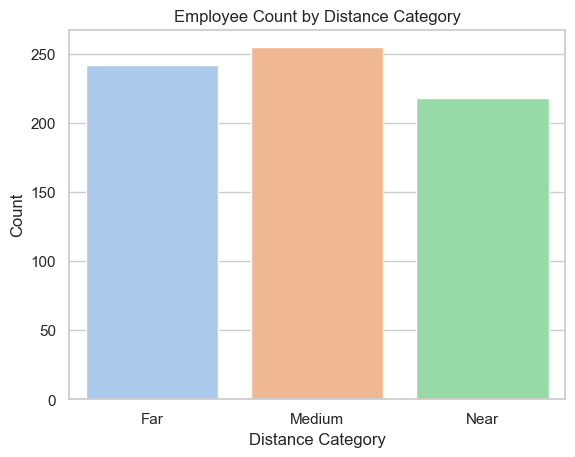

In [31]:
# 1: BMI categories (Underweight, Normal, Overweight, Obese)
df['BMI_Category'] = df['Body_mass_index'].apply(lambda x:'Underweight' if x < 18.5 else 'Normal' if 18.5 <= x < 25 else 'Overweight' 
if 25 <= x < 30 else 'Obese').astype("category")

sns.countplot(data=df, x='BMI_Category', order=['Underweight', 'Normal', 'Overweight', 'Obese'], palette='pastel')
plt.title('Employee Count by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Employees')
plt.show()


#2: Distance bins (Near, Medium, Far)
df['Distance_Category'] = df['Dist_ResidenceToWork'].apply(lambda x:'Near' if x <= 20 else 'Medium' if 20 < x <= 35 else 'Far').astype("category")
df['Distance_Category'].info()
sns.countplot(data=df, x='Distance_Category', palette='pastel')
plt.title('Employee Count by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.show()

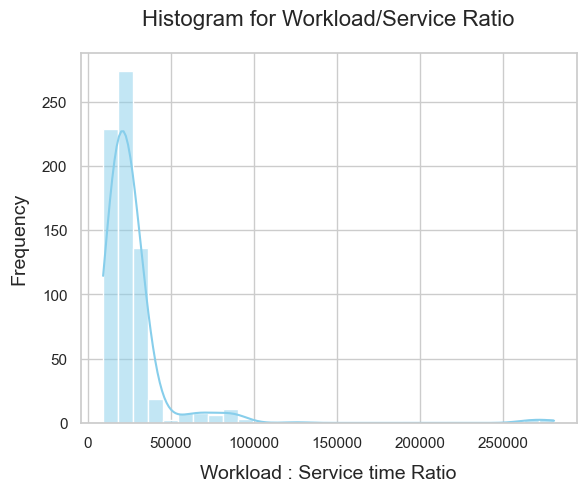

In [32]:
df['Workload_Service_Ratio'] = df['Average_Workload'] / df['Service_Time']
sns.histplot(df['Workload_Service_Ratio'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Workload : Service time Ratio', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.title('Histogram for Workload/Service Ratio', fontsize=16, pad=20)

# Show the plot
plt.show()

In [33]:
df['Education'] = df['Education'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, 0 to 736
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Reason for absence       712 non-null    category
 1   Month_absence            714 non-null    category
 2   Week                     715 non-null    category
 3   Seasons                  715 non-null    category
 4   Transport_expense        709 non-null    float64 
 5   Dist_ResidenceToWork     712 non-null    float64 
 6   Service_Time             712 non-null    float64 
 7   Age                      713 non-null    float64 
 8   Average_Workload         707 non-null    float64 
 9   Hit target               709 non-null    float64 
 10  Disciplinary_failure     710 non-null    float64 
 11  Education                705 non-null    category
 12  Son                      709 non-null    category
 13  Social_drinker           712 non-null    category
 14  Social_smoker  

In [34]:
# Dropping the unwanted columns after feature engineering
df.drop(['Height','Weight','Dist_ResidenceToWork','Average_Workload','Service_Time', 'Absenteeism_time_in_hrs'],axis=1,inplace=True)


In [35]:
X = df.drop('Absenteeism_category', axis=1)
y = df['Absenteeism_category']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(572, 17)
(143, 17)
(572,)
(143,)


In [36]:
# Check data types
print("Train data types:")
print(X_train.dtypes)
print("\nTest data types:")
print(X_test.dtypes)

# Check data types
print("Train data types:")
print(y_train.dtypes)
print("\nTest data types:")
print(y_test.dtypes)

Train data types:
Reason for absence        category
Month_absence             category
Week                      category
Seasons                   category
Transport_expense          float64
Age                        float64
Hit target                 float64
Disciplinary_failure       float64
Education                 category
Son                       category
Social_drinker            category
Social_smoker             category
Pet                       category
Body_mass_index            float64
BMI_Category              category
Distance_Category         category
Workload_Service_Ratio     float64
dtype: object

Test data types:
Reason for absence        category
Month_absence             category
Week                      category
Seasons                   category
Transport_expense          float64
Age                        float64
Hit target                 float64
Disciplinary_failure       float64
Education                 category
Son                       category
Socia

In [37]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()


In [1]:
print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)

NameError: name 'numeric_features' is not defined

In [39]:
#Numeric: impute + scale (scaling needed for LR, harmless for DT)
numeric_transformer_lg = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_transformer_dt = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    
])

# Categorical: impute + one-hot encode
categorical_transformer = SkPipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_lg = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_lg, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

preprocessor_dt = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_dt, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

Handling Text Columns (categorical_transformer)
Imputation: We fix missing text data (like job title) by filling the blanks with the most_frequent category available.

Encoding: We immediately translate that cleaned text into a machine-readable format using One-Hot Encoding (converting categories into 1s and 0s).

Handling Number Columns (The numeric Pipelines)
Base Imputation: For both LR and DT, we handle missing numbers (like income) using the median to prevent extreme outliers from skewing our dataset.

***The Scaling Split***:

LR Pipeline (numeric_transformer_lg): Includes a StandardScaler because Logistic Regression needs all its numbers compressed into the same small range to work correctly.

DT Pipeline (numeric_transformer_dt): Skips the scaling step, as Decision Trees don't care about the size of the numbers, which saves us a bit of computation time.

In [40]:
log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_lg),          
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

In [58]:
dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_dt),          # same pre-processing
    
    ("clf", DecisionTreeClassifier(
        criterion="gini",                 # or "entropy" if you prefer
        max_depth=None,
        random_state=42
    ))
])

In [59]:
log_reg_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:
    # Logistic Regression
y_train_pred_lr = log_reg_pipeline.predict(X_train)
y_test_pred_lr  = log_reg_pipeline.predict(X_test)

In [61]:
# Decision Tree
y_train_pred_dt = dt_pipeline.predict(X_train)
y_test_pred_dt  = dt_pipeline.predict(X_test)

In [62]:
print("\n================ LOGISTIC REGRESSION ================")
print("\nTRAIN Confusion Matrix (LR):")
print(confusion_matrix(y_train, y_train_pred_lr))
print("\nTRAIN Classification Report (LR):")
print(classification_report(y_train, y_train_pred_lr))

print("\nTEST Confusion Matrix (LR):")
print(confusion_matrix(y_test, y_test_pred_lr))
print("\nTEST Classification Report (LR):")
print(classification_report(y_test, y_test_pred_lr))


print("\n================ DECISION TREE (GINI) ================")
print("\nTRAIN Confusion Matrix (DT):")
print(confusion_matrix(y_train, y_train_pred_dt))
print("\nTRAIN Classification Report (DT):")
print(classification_report(y_train, y_train_pred_dt))

print("\nTEST Confusion Matrix (DT):")
print(confusion_matrix(y_test, y_test_pred_dt))
print("\nTEST Classification Report (DT):")
print(classification_report(y_test, y_test_pred_dt))



================ LOGISTIC REGRESSION ================

TRAIN Confusion Matrix (LR):
[[182  15  11]
 [ 23 181  18]
 [ 30  65  47]]

TRAIN Classification Report (LR):
              precision    recall  f1-score   support

        high       0.77      0.88      0.82       208
         low       0.69      0.82      0.75       222
      medium       0.62      0.33      0.43       142

    accuracy                           0.72       572
   macro avg       0.70      0.67      0.67       572
weighted avg       0.70      0.72      0.70       572


TEST Confusion Matrix (LR):
[[43  6  5]
 [ 3 47  4]
 [ 8 19  8]]

TEST Classification Report (LR):
              precision    recall  f1-score   support

        high       0.80      0.80      0.80        54
         low       0.65      0.87      0.75        54
      medium       0.47      0.23      0.31        35

    accuracy                           0.69       143
   macro avg       0.64      0.63      0.62       143
weighted avg       0.66    

In [65]:
dt_pipeline_EN = Pipeline(steps=[
    ("preprocess", preprocessor_dt),          # same pre-processing
    ("clf", DecisionTreeClassifier(
        criterion="entropy",                 # or "entropy" if you prefer
        max_depth=None,
        random_state=42
    ))
])

In [66]:
dt_pipeline_EN.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [67]:
# Decision Tree - Entropy
y_train_pred_dt_EN = dt_pipeline_EN.predict(X_train)
y_test_pred_dt_EN  = dt_pipeline_EN.predict(X_test)

In [68]:
print("\n================ DECISION TREE (Entropy) ================")
print("\nTRAIN Confusion Matrix (DT):")
print(confusion_matrix(y_train, y_train_pred_dt_EN))
print("\nTRAIN Classification Report (DT):")
print(classification_report(y_train, y_train_pred_dt))

print("\nTEST Confusion Matrix (DT):")
print(confusion_matrix(y_test, y_test_pred_dt_EN))
print("\nTEST Classification Report (DT):")
print(classification_report(y_test, y_test_pred_dt))


================ DECISION TREE (Entropy) ================

TRAIN Confusion Matrix (DT):
[[207   0   1]
 [  1 221   0]
 [  3   7 132]]

TRAIN Classification Report (DT):
              precision    recall  f1-score   support

        high       0.98      1.00      0.99       208
         low       0.97      1.00      0.98       222
      medium       0.99      0.93      0.96       142

    accuracy                           0.98       572
   macro avg       0.98      0.97      0.98       572
weighted avg       0.98      0.98      0.98       572


TEST Confusion Matrix (DT):
[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]

TEST Classification Report (DT):
              precision    recall  f1-score   support

        high       0.75      0.80      0.77        54
         low       0.62      0.70      0.66        54
      medium       0.44      0.31      0.37        35

    accuracy                           0.64       143
   macro avg       0.61      0.60      0.60       143
weighted avg       0.63

# SMOTING

In [69]:
dt_pipeline_GS = Pipeline(steps=[
    ("preprocess", preprocessor_dt),          # same pre-processing
    ("smote", SMOTE(random_state=42)),     # same imbalance handling
    ("clf", DecisionTreeClassifier(
        criterion="gini",                 # or "entropy" if you prefer
        max_depth=None,
        random_state=42
    ))
])

In [70]:
dt_pipeline_GS.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
y_train_pred_dt_GS = dt_pipeline_EN.predict(X_train)
y_test_pred_dt_GS  = dt_pipeline_EN.predict(X_test)

In [73]:
print("\nTEST Confusion Matrix (DT):")
print(confusion_matrix(y_test, y_test_pred_dt_GS ))
print("\nTEST Classification Report (DT):")
print(classification_report(y_test, y_test_pred_dt_GS ))


TEST Confusion Matrix (DT):
[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]

TEST Classification Report (DT):
              precision    recall  f1-score   support

        high       0.72      0.72      0.72        54
         low       0.58      0.65      0.61        54
      medium       0.34      0.29      0.31        35

    accuracy                           0.59       143
   macro avg       0.55      0.55      0.55       143
weighted avg       0.58      0.59      0.58       143



In [75]:
dt_pipeline_ES = Pipeline(steps=[
    ("preprocess", preprocessor_dt),          # same pre-processing
    ("smote", SMOTE(random_state=42)),     # same imbalance handling
    ("clf", DecisionTreeClassifier(
        criterion="entropy",                
        max_depth=None,
        random_state=42
    ))
])

In [76]:
dt_pipeline_ES.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
y_train_pred_dt_ES = dt_pipeline_EN.predict(X_train)
y_test_pred_dt_ES  = dt_pipeline_EN.predict(X_test)

In [78]:
print("\nTEST Confusion Matrix (DT):")
print(confusion_matrix(y_test, y_test_pred_dt_ES ))
print("\nTEST Classification Report (DT):")
print(classification_report(y_test, y_test_pred_dt_ES ))


TEST Confusion Matrix (DT):
[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]

TEST Classification Report (DT):
              precision    recall  f1-score   support

        high       0.72      0.72      0.72        54
         low       0.58      0.65      0.61        54
      medium       0.34      0.29      0.31        35

    accuracy                           0.59       143
   macro avg       0.55      0.55      0.55       143
weighted avg       0.58      0.59      0.58       143



In [79]:
log_reg_pipeline_S = Pipeline(steps=[
    ("preprocess", preprocessor_lg),          
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

In [80]:
log_reg_pipeline_S.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [82]:
    # Logistic Regression
y_train_pred_lr_S = log_reg_pipeline.predict(X_train)
y_test_pred_lr_S  = log_reg_pipeline.predict(X_test)

In [83]:
print("\nTEST Confusion Matrix (LR):")
print(confusion_matrix(y_test, y_test_pred_lr_S))
print("\nTEST Classification Report (LR):")
print(classification_report(y_test, y_test_pred_lr_S))


TEST Confusion Matrix (LR):
[[43  6  5]
 [ 3 47  4]
 [ 8 19  8]]

TEST Classification Report (LR):
              precision    recall  f1-score   support

        high       0.80      0.80      0.80        54
         low       0.65      0.87      0.75        54
      medium       0.47      0.23      0.31        35

    accuracy                           0.69       143
   macro avg       0.64      0.63      0.62       143
weighted avg       0.66      0.69      0.66       143





### Logistic Regression (LR) Before Smoting:

- **Train accuracy = 0.72**
- **Test accuracy = 0.67**

This is normal → **no severe overfitting**.

But LR struggles with the **medium** class:

This suggests the medium class is hardest to predict.

### Logistic Regression (LR) After Smoting:

- **Test accuracy = 0.69**

This is normal → **no severe overfitting**.

But LR struggles with the **medium** class:

This suggests the medium class is hardest to predict.

# Decision Tree (Gini, Before SMOTE)


TEST Confusion Matrix


[[43  7  4]
 [ 6 38 10]
 [ 8 16 11]]
 

Test Accuracy: 0.64

The tree memorizes training data (classic overfitting).

On test data, minority detection (medium class) is weak.

Though high train scores, generalization suffers : expected with deep trees on imbalanced data.


# Decision Tree (Entropy, Before SMOTE)


[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]

 Test Accuracy: 0.59

 Train results still show strong overfitting.

Test-set performance drops slightly compared to the Gini tree.


# Decision Tree (Gini, After SMOTE)

TEST Confusion Matrix


[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]
 

SMOTE did not improve Decision Tree performance significantly.

Tree remains highly sensitive to noise and depth; synthetic samples may increase variance.

Medium class recall remains low despite oversampling.

Overfitting remains.

# Decision Tree (Entropy, After SMOTE)


TEST Confusion Matrix

[[39  9  6]
 [ 6 35 13]
 [ 9 16 10]]


Test Accuracy: 0.59


 Results nearly identical to Gini after SMOTE.

Performance remains limited with little gain in medium class prediction.

Deep trees require pruning or ensemble approaches to benefit from oversampling.